# Argon Free Particles [Langevin with Euler Integrator]

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
import pyunitwizard as puw

puw.configure.load_library(['pint'])
rng = np.random.default_rng()

In [2]:
dim = 3
n_particles = 10 #200

In [3]:
masses = np.full(n_particles, 39.948) * puw.unit('amu/mol')

In [4]:
masses[0]

39.948 <Unit('unified_atomic_mass_unit / mole')>

In [5]:
damping = 20.0/puw.unit('ps')
temperature = 300.0*puw.unit('K')
delta_t = 0.01*puw.unit('ps')

In [6]:
Kb = 1.38064852e-23*puw.unit('J/K')
NA = 6.02214086e23*puw.unit('1/mol')

KB = Kb*NA

KT = KB*temperature

In [7]:
KT

2494.337959677158 <Unit('joule / mole')>

In [8]:
def potential (positions):
    
    return 0.0*puw.unit('J/mol')

def potential_forces (positions):
    
    return np.zeros(positions.shape) * puw.unit('J/mol/nm')

In [9]:
def dissipation_forces(damping, velocities, masses):
    
    return -damping*masses[:, np.newaxis]*velocities

In [10]:
def fluctuation_forces(damping, KT, dim, masses):
    
    global rng
    
    n_particles = masses.shape[0]
    
    sigma = np.sqrt(2.0*damping*KT*masses/puw.unit('seconds'))
    
    return rng.normal(size=[n_particles, dim]) * sigma[:, np.newaxis]

In [11]:
def euler_integrator(positions, velocities, forces, masses, delta_t):
    
    new_positions = positions + velocities * delta_t
    new_velocities = velocities + (forces/masses[:, np.newaxis]) * delta_t
    
    return new_positions, new_velocities

In [12]:
simulation_t = 0.10*puw.unit('ns')
n_steps = int(simulation_t/delta_t)

In [13]:
positions = np.zeros([n_particles, dim])*puw.unit('nm')
velocities = np.zeros([n_particles, dim])*puw.unit('nm/ps')

In [14]:
trajectory_positions = np.zeros([n_steps, n_particles, dim])*puw.unit('nm')
trajectory_velocities = np.zeros([n_steps, n_particles, dim])*puw.unit('nm/ps')
trajectory_time = np.zeros([n_steps])*puw.unit('ps')

In [15]:
trajectory_positions.nbytes/1024/1024/1024 

0.0022351741790771484

In [16]:
trajectory_positions[0,:,:] = positions
trajectory_velocities[0,:,:] = velocities
trajectory_time[0] = 0.0*puw.unit('ps')

In [17]:
aa = (potential_forces(positions)+dissipation_forces(damping, velocities, masses))/masses[:, np.newaxis]

In [18]:
puw.convert(aa, 'nm/(ps*ps)')

Magnitude,[[0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0] [0.0 0.0 0.0]]
Units,nanometer/picosecond2


In [19]:
fluctuation_forces(damping, KT, dim, masses)

Magnitude,[[1376.5883854850956 -112.0734824693615 1183.1936512047207] [-1658.6741970414064 2195.0653279417975 2767.0751969550934] [3167.647938020591 1403.2306927808627 -1629.0982768922927] [-448.8565793880985 -1218.7636421184732 1258.7221443585859] [2117.351470391195 -1216.296074537562 967.9187385320554] [88.05398750753986 1219.908645263946 -1854.8059514657443] [-1130.565604452692 -1956.0664057258557 759.4510301621393] [2286.146927187139 -2311.9893080102856 1489.4890898592244] [1064.0088250838653 -3082.3208782066304 -1018.1332212442135] [1218.4410208630948 -669.7912655824489 1467.7915604790392]]
Units,joule0.5 unified_atomic_mass_unit0.5/(mole picosecond0.5 second0.5)


In [21]:
for step_index in tqdm(range(1, n_steps)):
    
    forces = potential_forces(positions)
    forces += dissipation_forces(damping, velocities, masses)
    forces += fluctuation_forces(damping, KT, dim, masses)
    
    positions, velocities = euler_integrator(positions, velocities, forces, masses, delta_t)
    
    trajectory_positions[step_index, :, :] = positions[:, :]
    trajectory_velocities[step_index, :, :] = velocities[:, :]
    trajectory_time[step_index] = step_index*delta_t

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:27<00:00, 370.23it/s]


/home/diego/Myopt/miniconda3/envs/Molecular-Dynamics-DIY/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/diego/Myopt/miniconda3/envs/Molecular-Dynamics-DIY/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/diego/Myopt/miniconda3/envs/Molecular-Dynamics-DIY/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


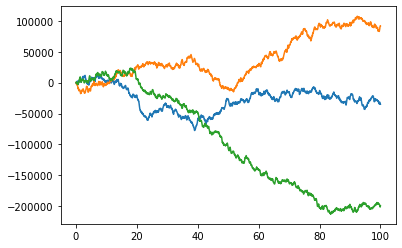

In [22]:
particle_index=0

plt.plot(trajectory_time, trajectory_positions[:, particle_index, 0])
plt.plot(trajectory_time, trajectory_positions[:, particle_index, 1])
plt.plot(trajectory_time, trajectory_positions[:, particle_index, 2])
plt.show()

In [ ]:
trajectory_positions[:, particle_index, 0]